In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [3]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


## 히트맵

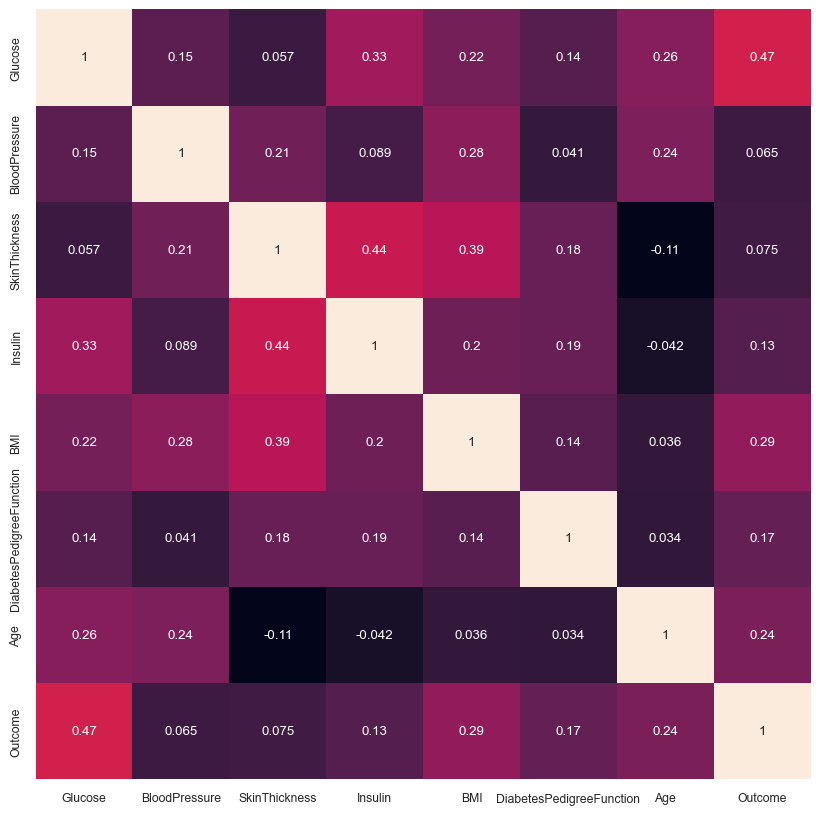

In [6]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
y = df["BMI"]
y.value_counts()


32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

In [9]:
x = df.drop("BMI" , axis = 1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,
6,148,72,35,0,0.627,50,1
1,85,66,29,0,0.351,31,0
8,183,64,0,0,0.672,32,1
1,89,66,23,94,0.167,21,0
0,137,40,35,168,2.288,33,1
...,...,...,...,...,...,...,...
10,101,76,48,180,0.171,63,0
2,122,70,27,0,0.340,27,0
5,121,72,23,112,0.245,30,0


# 원-핫 인코딩

In [10]:
Y = pd.get_dummies(y).values
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
X = x.values
X

array([[148.   ,  72.   ,  35.   , ...,   0.627,  50.   ,   1.   ],
       [ 85.   ,  66.   ,  29.   , ...,   0.351,  31.   ,   0.   ],
       [183.   ,  64.   ,   0.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,   0.245,  30.   ,   0.   ],
       [126.   ,  60.   ,   0.   , ...,   0.349,  47.   ,   1.   ],
       [ 93.   ,  70.   ,  31.   , ...,   0.315,  23.   ,   0.   ]])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 


((614, 7), (614, 248), (154, 7), (154, 248))

In [15]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [19]:
N_EPOCHS = 15

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/15
20/20 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2/15
20/20 [==============================] - 0s 1ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3/15
20/20 [==============================] - 0s 1ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4/15
20/20 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 5/15
20/20 [==============================] - 0s 1ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 6/15
20/20 [==============================] - 0s 1ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 7/15
20/20 [==============================] - 0s 1ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 8/15
20/20 [==============================] - 0s 1ms/step - loss: 0.0051 - mse: 0.00

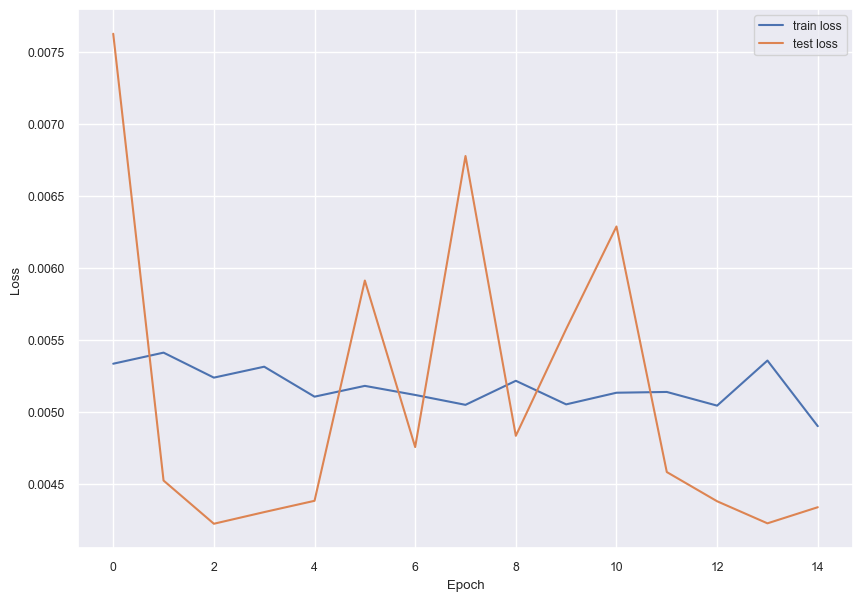

In [20]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043


[0.0043397811241447926, 0.0043397811241447926]